<a href="https://colab.research.google.com/github/erikaprbwt/AB_test/blob/main/AB_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis and Pre-processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as sp

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/cookie_cats.csv')

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (8,4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


#Struktur Data
*   Dataset terdiri dari 90189 baris dan 5 kolom
*   Tidak terdapat missing value pada setiap atribut
*   Terdapat 2 variabel bool, 2 variabel integer dan 1 variabel object

#Data Dictionary
Atribut/variabel pada dataset yaitu:
*   userid - nomor unik yang mengidentifikasi tiap pemain games.
*   version - player yang dimasukkan pada grup `control` (`gate_30`) atau grup `test` (`gate_40`).
*   sum_gamerounds - banyak ronde game yang dimainkan pemain selama minggu pertama setelah instalasi.
*   retention_1 - apakah pemain kembali lagi dan bermain 1 hari setelah instalasi?
*   retention_7 - apakah pemain kembali lagi dan bermain 7 hari setelah instalasi?

Ketika pemain menginstal game, mereka secara random dikelompokkan ke `gate_30` atau `gate_40`

[Sumber Data](https://www.kaggle.com/ekrembayar/a-b-testing-step-by-step-hypothesis-testing) 

In [ ]:
#jika terdapat missing value
df=df.dropna()

In [ ]:
df.head(3)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False


In [ ]:
#cek apakah ada duplikasi userid
user_counts = df['userid'].value_counts(ascending=False)
multi_users = user_counts[user_counts > 1].count()
print(f'Terdapat {multi_users} users yang muncul beberapa kali dalam dataset')

Terdapat 0 users yang muncul beberapa kali dalam dataset


In [ ]:
#jika terdapat duplikasi
users_to_drop = user_counts[user_counts > 1].index
df = df[~df['userid'].isin(users_to_drop)]

In [ ]:
#mendefinisikan variabel contol dan test
control = df[df['version']=='gate_30']
test = df[df['version']=='gate_40']

In [ ]:
#mentransformasi data string menjadi numerik (nominal)
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['retention_1']= labelencoder.fit_transform(df['retention_1'])
df['retention_7']= labelencoder.fit_transform(df['retention_7'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


#**Statistik Deskriptif**

In [ ]:
#menghitung banyak success control dan test
n_success_control=control['retention_1'].sum()
n_obs_control=control['retention_1'].count()

n_success_test=test['retention_1'].sum()
n_obs_test=test['retention_1'].count()

In [ ]:
print(f'Terdapat {n_success_control} success control dan {n_success_test} success test')

Terdapat 20034 success control dan 45489 success test


In [ ]:

#menghitung conversion rate
control_conv_rate = n_success_control/n_obs_control
test_conv_rate = n_success_test/n_obs_test
print('control conversion rate : {0:.4f}'.format(control_conv_rate))
print('test conversion rate : {0:.4f}'.format(test_conv_rate))

control conversion rate : 0.4482
test conversion rate : 0.4423


(0.0, 0.5)

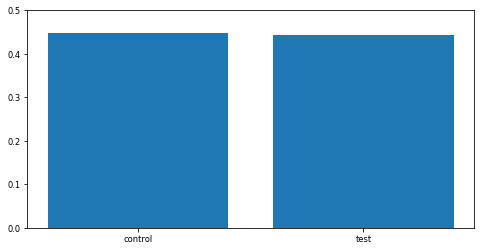

In [ ]:
x=['control', 'test']
value = [control_conv_rate, test_conv_rate]
plt.bar(x,value)
plt.ylim(0,0.5)

*  Terlihat bahwa terdapat sedikit perbedaan/selisih conversion rate grup `control` dan `test`.
* Untuk menentukan apakah kedua grup secara signifikan sama atau berbeda, perlu dilakukan tes hipotesis.

#**Hypothesis Testing**

*As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention (D1 retention).*

In [ ]:
#making array
success = np.array([n_success_control, n_success_test])
obs = np.array([n_obs_control, n_obs_test])

H0 : gate_30 dan gate_40 memiliki conversion rate **sama**.

H1 : gate_30 dan gate_40 memiliki conversion rate **berbeda**.

In [ ]:
stats,pvalue=sp.proportions_ztest(success,obs)
print('p-value : {0:.4f}'.format(pvalue))
if pvalue >=0.05:
   print('tidak memadai untuk menolak H0')
else:
   print('H0 ditolak')

p-value : 0.0744
tidak memadai untuk menolak H0



**Kesimpulan**

Berdasarkan uji z di atas, maka secara statistik, kedua group (`gate_30` dan `gate_40`) memberikan D1 retention yang **sama**.